<a href="https://colab.research.google.com/github/stymgupta/Exploratory-Data-Analysis-Terrorism/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4: Exploratory Data Analysis - Terrorism**

**Problem: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.
As a security/defense analyst, try to find out the hot zone of terrorism.
What all security issues and insights you can derive by EDA?**

Dataset: https://bit.ly/2TK5Xn5

***Author: Vaibhav Kumar***

**Importing The Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading The Dataset**

In [ ]:
terrorism = pd.read_csv("/content/drive/MyDrive/Global Terrorism - START data/globalterrorismdb_0718dist.csv", encoding='latin1')
terrorism.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Number of Rows and Columns
terrorism.shape

(181691, 135)

In [ ]:
#information about the columns
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#Description of Dataset
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
#Finding Correlation of Dataframe
terrorism.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

**Filling in Missing Values (which shows as NaN in Dataset)**

In [ ]:
terrorism = terrorism.fillna(0)
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,14,Private Citizens & Property,68.0,Named Civilian,0,Julio Guzman,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,6,Hostage Taking (Kidnapping),0.0,0,0.0,0,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,1.0,1.0,0.0,0.0,0.0,0,Mexico,1.0,800000.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Embassy,...,0.0,0,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,0,0,1,1,1,-9.0,0.0,0,0.0,1,0,7,Facility/Infrastructure Attack,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Consulate,...,0.0,0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0


**Finding out the total countries where attackers have occured**

In [ ]:
country = np.array(terrorism['country_txt'])
country = np.unique(country)
print(country)
print("Total Number of Countries are:",len(country))

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia-Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Czechoslovakia' 'Democratic Republic of the Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Germany (GDR)'
 'East Timor' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Internationa

In [ ]:
#Let us see what are all 135 columns are there
for col in terrorism.columns:
  print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

**Maximum Attacks occured in a country are:**

In [ ]:
attacks = {}
for i in country:
  country_data = terrorism[terrorism['country_txt']==i]
  index = country_data.index
  rows = len(index)
  attacks.update({i:rows})
attacks

{'Afghanistan': 12731,
 'Albania': 80,
 'Algeria': 2743,
 'Andorra': 1,
 'Angola': 499,
 'Antigua and Barbuda': 1,
 'Argentina': 815,
 'Armenia': 24,
 'Australia': 114,
 'Austria': 115,
 'Azerbaijan': 49,
 'Bahamas': 5,
 'Bahrain': 207,
 'Bangladesh': 1648,
 'Barbados': 3,
 'Belarus': 13,
 'Belgium': 154,
 'Belize': 8,
 'Benin': 8,
 'Bhutan': 6,
 'Bolivia': 314,
 'Bosnia-Herzegovina': 159,
 'Botswana': 10,
 'Brazil': 273,
 'Brunei': 6,
 'Bulgaria': 52,
 'Burkina Faso': 52,
 'Burundi': 613,
 'Cambodia': 259,
 'Cameroon': 332,
 'Canada': 96,
 'Central African Republic': 283,
 'Chad': 91,
 'Chile': 2365,
 'China': 252,
 'Colombia': 8306,
 'Comoros': 5,
 'Costa Rica': 67,
 'Croatia': 57,
 'Cuba': 30,
 'Cyprus': 132,
 'Czech Republic': 32,
 'Czechoslovakia': 10,
 'Democratic Republic of the Congo': 775,
 'Denmark': 41,
 'Djibouti': 22,
 'Dominica': 3,
 'Dominican Republic': 90,
 'East Germany (GDR)': 38,
 'East Timor': 10,
 'Ecuador': 220,
 'Egypt': 2479,
 'El Salvador': 5320,
 'Equatorial 

In [ ]:
max_attacks = max(attacks, key = attacks.get)
print(max_attacks)

Iraq


**The Data says that Iraq has maximum terrorism attacks which is 24636**

**Now Fetch all the data about Iraq**

In [ ]:
iraq = terrorism[terrorism['country_txt']=='Iraq']
iraq

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2854,197503010002,1975,3,1,0,0,0,95,Iraq,10,Middle East & North Africa,Nineveh,Mosul,36.354145,43.143570,1.0,0,0,0,1,1,1,-9.0,0.0,0,0.0,1,0,4,Hijacking,0.0,0,0.0,0,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Iraqi Airways,B-737,...,0.0,0,Armed,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0,0.0,0,1.0,-99.0,0.0,0.0,0.0,Iran,Iran,1.0,5000000.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,Hijacking DB,-9,-9,0,-9,0
4385,197612150001,1976,12,15,0,0,0,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,6,Airports & Aircraft,44.0,Airport,0,Airport terminal,...,0.0,0,Explosive - 8 kg TNT,10.0,0.0,0.0,285.0,0.0,0.0,1,3.0,Minor (likely < $1 million),2000.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,0,-9,0
4393,197612180001,1976,12,18,0,1,3/29/1977,95,Iraq,10,Middle East & North Africa,Unknown,Penjwon,0.000000,0.000000,5.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,6,Hostage Taking (Kidnapping),0.0,0,0.0,0,2,Government (General),18.0,"Government Personnel (excluding police, military)",Polish government,agricultural experts in NE Iraq,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,1.0,5.0,0.0,0.0,101.0,0,Iraq,1.0,0.0,0.0,0.0,0.0,0,2.0,Hostage(s) released by perpetrators,1.0,0,0,0,0,PGIS,0,1,1,1,0
4402,197612240001,1976,12,24,0,0,0,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,22,Violent Political Party,109.0,Party Official/Candidate/Other Personnel,Popular Front for the Liberation of Palestine ...,Personnel,...,0.0,0,Automatic firearm,2.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
8688,197906150001,1979,6,15,0,0,0,95,Iraq,10,Middle East & North Africa,Basra,Basra,30.510054,47.778095,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Baath party,local secretary,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,0,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181669,201712310002,2017,12,30,0,0,0,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465,1.0,0,The incident occurred on Al-Quds street.,12/30/2017: Assailants threw grenades at a caf...,1,1,1,0.0,0.0,0,1.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,1,Business,2.0,Restaurant/Bar/Café,Unknown,Cafe,...,0.0,0,Between one and two grenades were used in the ...,0.0,0.0,0.0,5.0,0.0,0.0,-9,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,Casualty numbers conflict across sources. Foll...,"""Five civilians killed in two bomb attacks in ...","""Iraq: Security Roundup 1900 GMT 31 December 2...","""Iraq: Roundup of Violent Activities Targeting...",START Primary Collection,-9,-9,0,-9,"20

**Graphically Shown this data**

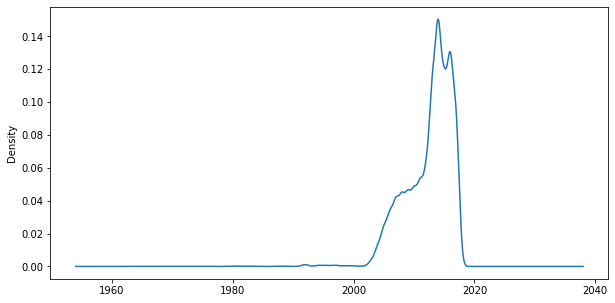

In [ ]:
iraq['iyear'].plot(kind='kde', figsize=(10, 5), xlabel='Year')

**The Graph clearly shows that most of the attacks are between 2000-2020**

**Months when most attcks took place**

In [ ]:
months = np.array(iraq['imonth'])
def most_frequent(List):
  return max(set(List), key = List.count)

In [ ]:
most_frequent(months.tolist())

11

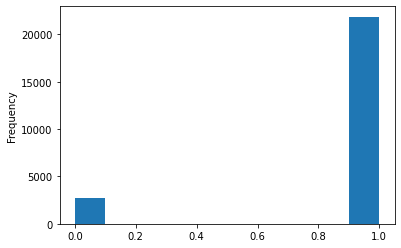

In [ ]:
#Checking the success rate of attacks in Iraq
iraq['success'].plot(kind='hist')

**Checking attack types and looking for the most frequent attack type in Iraq**

In [ ]:
attack_type= np.array(iraq['attacktype1_txt'])
attack_type= np.unique(attack_type)
attack_type

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'],
      dtype=object)

In [ ]:
attack = {}
for i in attack_type:
  att_ack = iraq[iraq['attacktype1_txt']==i]
  index = att_ack.index
  rows = len(index)
  attack.update({i:rows})
attack

{'Armed Assault': 3155,
 'Assassination': 1287,
 'Bombing/Explosion': 18286,
 'Facility/Infrastructure Attack': 154,
 'Hijacking': 13,
 'Hostage Taking (Barricade Incident)': 24,
 'Hostage Taking (Kidnapping)': 946,
 'Unarmed Assault': 6,
 'Unknown': 765}

([<matplotlib.axis.XTick at 0x7fcfd16f4490>,
 [Text(0, 0, 'Armed Assault'),
  Text(0, 0, 'Assassination'),
  Text(0, 0, 'Bombing/Explosion'),
  Text(0, 0, 'Facility/Infrastructure Attack'),
  Text(0, 0, 'Hijacking'),
  Text(0, 0, 'Hostage Taking (Barricade Incident)'),
  Text(0, 0, 'Hostage Taking (Kidnapping)'),
  Text(0, 0, 'Unarmed Assault'),
  Text(0, 0, 'Unknown')])

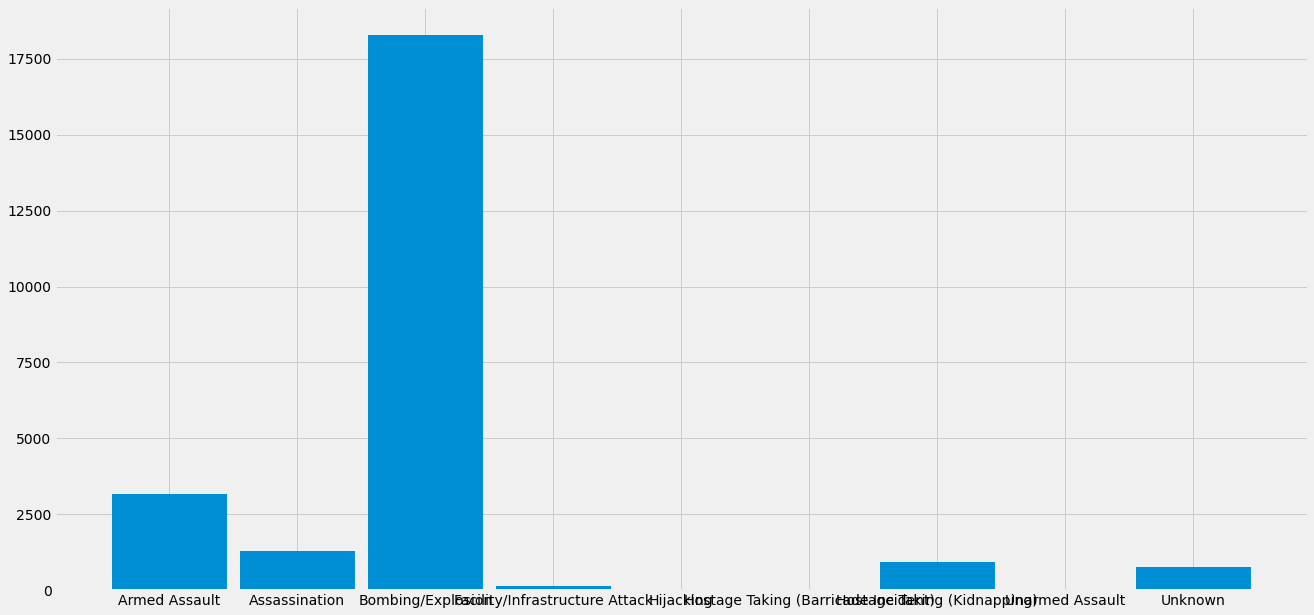

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.bar(range(len(attack)), list(attack.values()), align='center', width=0.9)
plt.xticks(range(len(attack)), list(attack.keys()))

**Checking targets of the attacks and the most common target in Iraq**

In [ ]:
target = np.array(iraq['targtype1_txt'])
target = np.unique(target)
target

array(['Airports & Aircraft', 'Business', 'Educational Institution',
       'Food or Water Supply', 'Government (Diplomatic)',
       'Government (General)', 'Journalists & Media', 'Maritime',
       'Military', 'NGO', 'Other', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Telecommunication', 'Terrorists/Non-State Militia', 'Tourists',
       'Transportation', 'Unknown', 'Utilities',
       'Violent Political Party'], dtype=object)

In [ ]:
targets = {}
for i in target:
  att_ack = iraq[iraq['targtype1_txt']==i]
  index = att_ack.index
  rows = len(index)
  targets.update({i:rows})
targets

{'Airports & Aircraft': 32,
 'Business': 2112,
 'Educational Institution': 271,
 'Food or Water Supply': 25,
 'Government (Diplomatic)': 127,
 'Government (General)': 2216,
 'Journalists & Media': 178,
 'Maritime': 2,
 'Military': 3333,
 'NGO': 28,
 'Other': 60,
 'Police': 3682,
 'Private Citizens & Property': 8747,
 'Religious Figures/Institutions': 661,
 'Telecommunication': 21,
 'Terrorists/Non-State Militia': 958,
 'Tourists': 9,
 'Transportation': 472,
 'Unknown': 1286,
 'Utilities': 337,
 'Violent Political Party': 79}

([<matplotlib.axis.XTick at 0x7fcfc6678b10>,
 [Text(0, 0, 'Airports & Aircraft'),
  Text(0, 0, 'Business'),
  Text(0, 0, 'Educational Institution'),
  Text(0, 0, 'Food or Water Supply'),
  Text(0, 0, 'Government (Diplomatic)'),
  Text(0, 0, 'Government (General)'),
  Text(0, 0, 'Journalists & Media'),
  Text(0, 0, 'Maritime'),
  Text(0, 0, 'Military'),
  Text(0, 0, 'NGO'),
  Text(0, 0, 'Other'),
  Text(0, 0, 'Police'),
  Text(0, 0, 'Private Citizens & Property'),
  Text(0, 0, 'Religious Figures/Institutions'),
  Text(0, 0, 'Telecommunication'),
  Text(0, 0, 'Terrorists/Non-State Militia'),
  Text(0, 0, 'Tourists'),
  Text(0, 0, 'Transportation'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, 'Utilities'),
  Text(0, 0, 'Violent Political Party')])

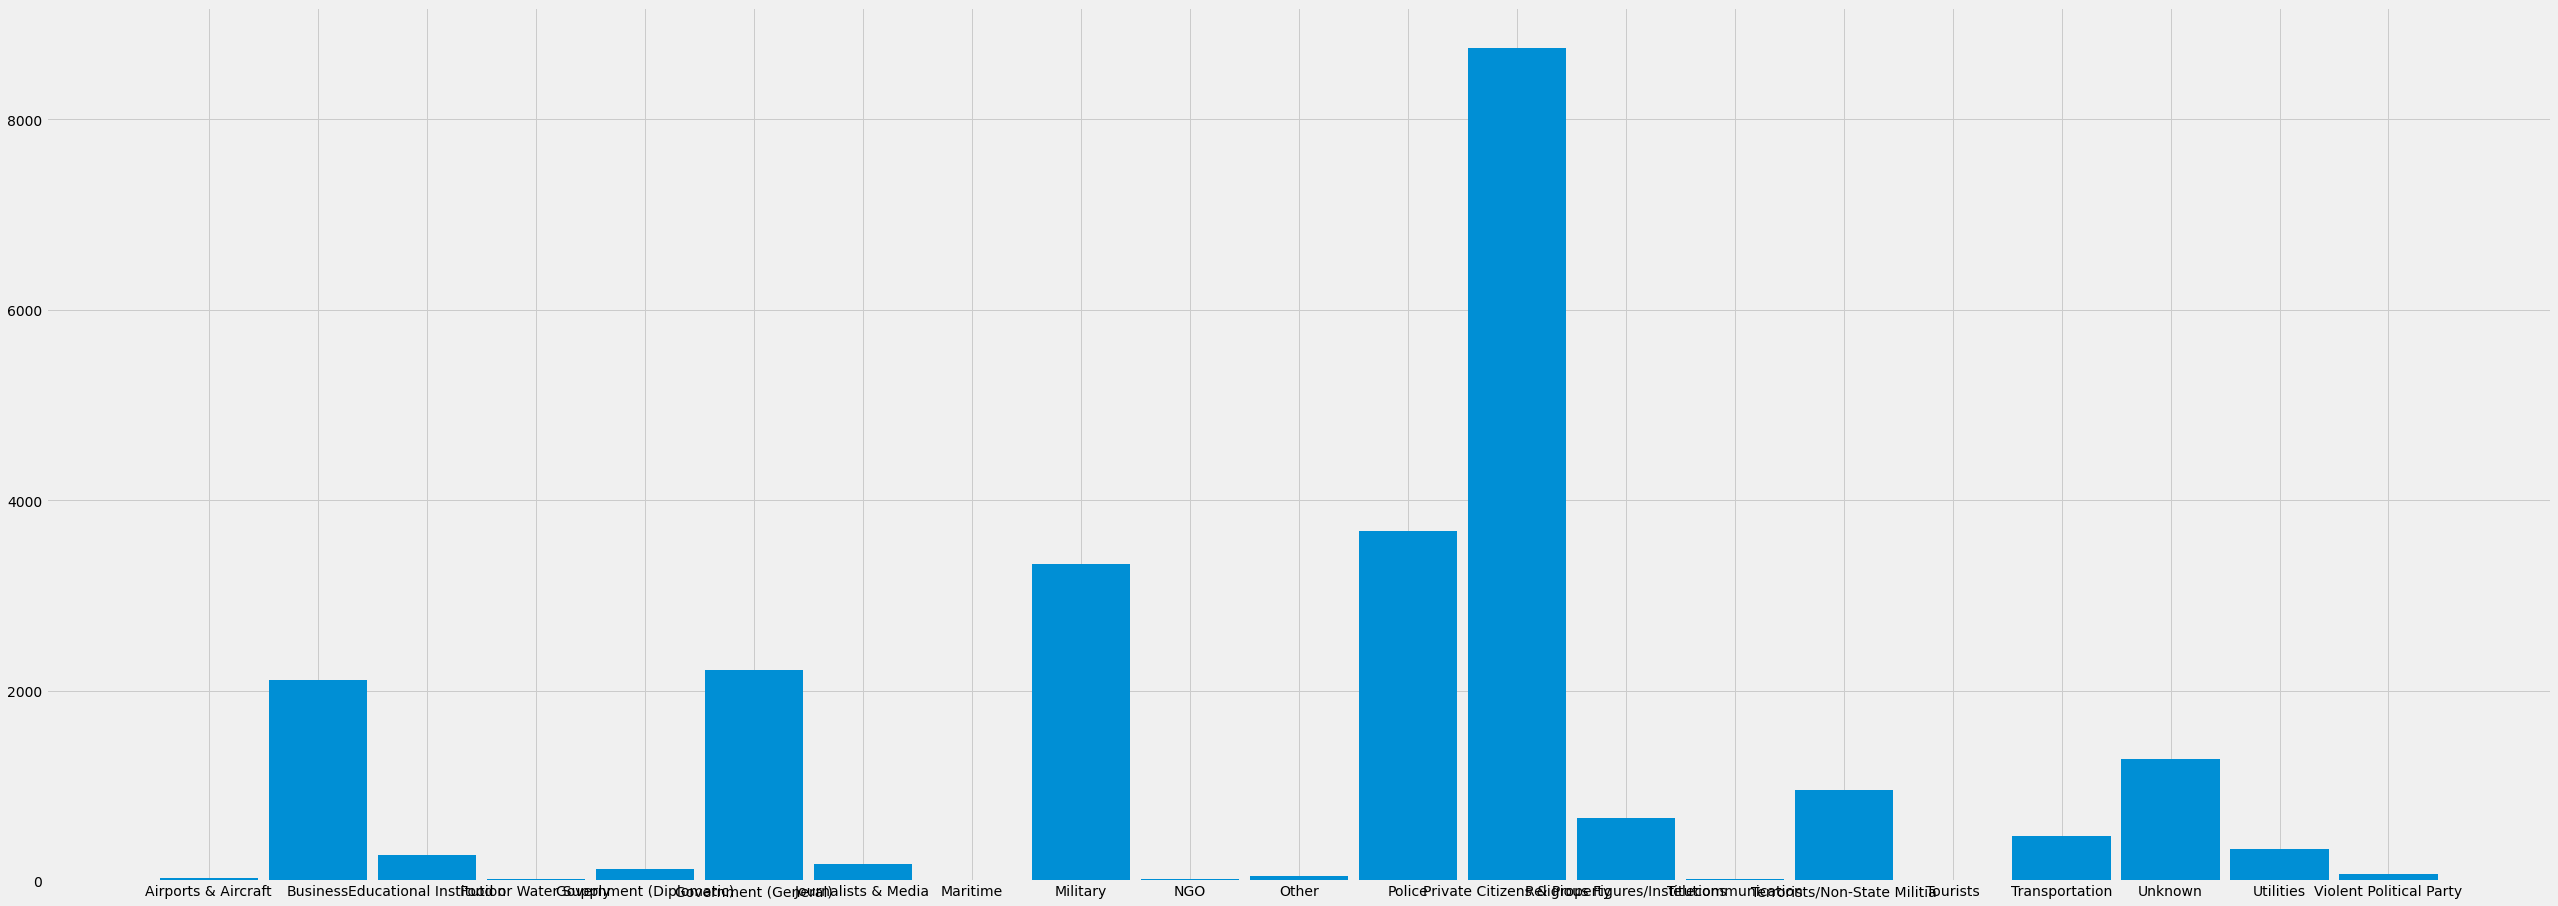

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,15))
plt.bar(range(len(targets)), list(targets.values()), align='center', width=0.9)
plt.xticks(range(len(targets)), list(targets.keys()))

In [ ]:
killed = np.array(iraq['nkill'])
total_killed = sum(killed.tolist())
total_killed

78589.0

In [ ]:
wounded = np.array(iraq['nwound'])
total_wounded = sum(wounded.tolist())
total_wounded

134690.0

**Training and testing a classifier for the types of attacks in Iraq**


In [ ]:
columns = ['iyear', 'imonth', 'success', 'nperps', 'propextent', 'propvalue', 'ishostkid', 'nhours', 'ndays']

In [ ]:
X = iraq[columns]
Y = iraq['attacktype1_txt']

**Spliting data into training and testing data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

**Using a Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predict))
print('\n')
print(classification_report(Y_test,predict))

[[ 148   14  920    4    1    0    9    0]
 [  36  159  211    0    0    0    9    3]
 [  97   61 5788   20    0    1    3   31]
 [   0    1   26   17    0    0    0    0]
 [   0    0    3    0    0    0    2    0]
 [   0    1    0    0    0    4    4    0]
 [   4    5    4    0    2    4  281    0]
 [   5    1  233    3    0    0    2   13]]


              precision    recall  f1-score   support

           0       0.51      0.14      0.21      1096
           1       0.66      0.38      0.48       418
           2       0.81      0.96      0.88      6001
           3       0.39      0.39      0.39        44
           4       0.00      0.00      0.00         5
           5       0.44      0.44      0.44         9
           6       0.91      0.94      0.92       300
           8       0.28      0.05      0.09       257

    accuracy                           0.79      8130
   macro avg       0.50      0.41      0.43      8130
weighted avg       0.74      0.79      0.74      8130



**With the Decision Tree Classifier, the accuracy came out to be 79%**

**Now, using a Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(Y_test, pred))
print('\n')
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.13      0.21      1096
           1       0.71      0.37      0.48       418
           2       0.80      0.97      0.88      6001
           3       0.38      0.36      0.37        44
           4       0.00      0.00      0.00         5
           5       0.67      0.22      0.33         9
           6       0.89      0.98      0.93       300
           8       0.29      0.05      0.09       257

    accuracy                           0.79      8130
   macro avg       0.54      0.38      0.41      8130
weighted avg       0.75      0.79      0.74      8130



[[ 140   13  931    1    0    0   10    1]
 [  32  153  218    0    0    0   12    3]
 [  74   48 5826   21    0    1    3   28]
 [   0    0   28   16    0    0    0    0]
 [   0    0    3    0    0    0    2    0]
 [   0    1    0    0    0    2    6    0]
 [   1    1    3    1    1    0  293    0]
 [   5    1  233    3    0    0    2   13]]


**After applying Random Forest Classifier the accuracy is also same as Decision Tree Classifier i.e. 79%**

**THANK YOU**